<a href="https://colab.research.google.com/github/tomiambro/covid_transfer_learning/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
# ! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab
!pip install --upgrade git+https://github.com/fastai/fastai.git &> 2
!pip install pip install nbdev &> 2

In [203]:
from fastai.vision.all import *
from torchvision import transforms as T

import gc

In [204]:
dataset_path = 'gdrive/MyDrive/machine_learning/datasets/covid_dataset'  #change dir to your project folder
folder_path = 'gdrive/MyDrive/machine_learning/covid/'

In [205]:
from google.colab import drive

drive._mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


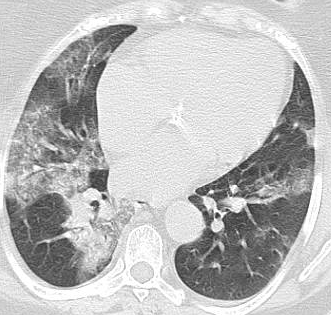

In [206]:
im = Image.open(f"{dataset_path}/COVID/Covid (1000).png")
im.to_thumb(350,350)

Create array with Path objects to imgs

In [207]:
path = Path(f"{dataset_path}")
fns = get_image_files(path)
fns

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [208]:
imgs = get_image_files(f"{dataset_path}")
imgs

(#2481) [Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1227).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1229).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1226).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1209).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1238).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1233).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1205).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1220).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1216).png'),Path('gdrive/MyDrive/machine_learning/datasets/covid_dataset/COVID/Covid (1223).png')...]

In [209]:
covid = DataBlock(
    blocks=(ImageBlock, CategoryBlock(['non-COVID', 'COVID'], sort=False)), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(350,350))

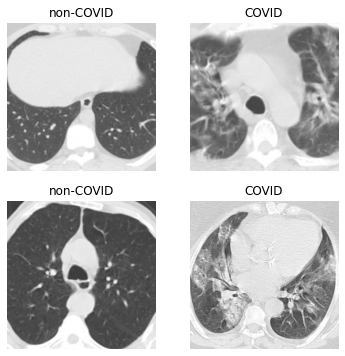

In [210]:
dls = covid.dataloaders(path)
dls.valid.show_batch(max_n=4)

In [211]:
dls.train.vocab

['non-COVID', 'COVID']

In [212]:
res18 = cnn_learner(dls, resnet18, metrics=[F1Score(), Recall()], path=folder_path)

In [213]:
lr = 1e-3
res18.fine_tune(3, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.805029,0.509375,0.769892,0.736626,00:35


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.430560,0.275512,0.894958,0.876543,00:38
1,0.304058,0.222203,0.922078,0.876543,00:38
2,0.218677,0.195783,0.936975,0.917695,00:38


In [214]:
df_rec18 = pd.DataFrame(res18.recorder.values, columns=['train_loss', 'valid_loss', 'f1_score', 'recall_score'])

In [215]:
df_rec18

,train_loss,valid_loss,f1_score,recall_score
0,0.430560,0.275512,0.894958,0.876543
1,0.304058,0.222203,0.922078,0.876543
2,0.218677,0.195783,0.936975,0.917695


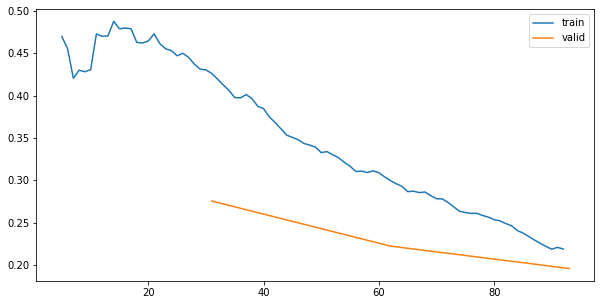

In [216]:
plt.figure(figsize=(10,5))
res18.recorder.plot_loss()

In [217]:
res18.recorder.values[-1][2]

0.9369747899159665

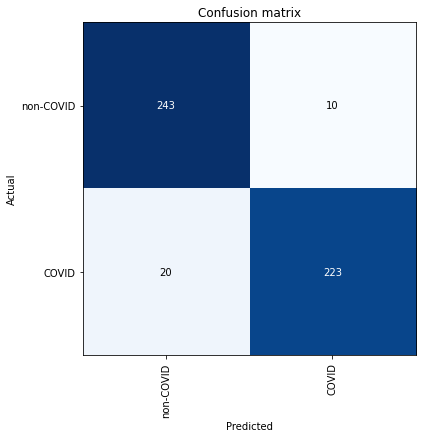

In [218]:
interp = ClassificationInterpretation.from_learner(res18)
interp.plot_confusion_matrix(figsize=(6,6))

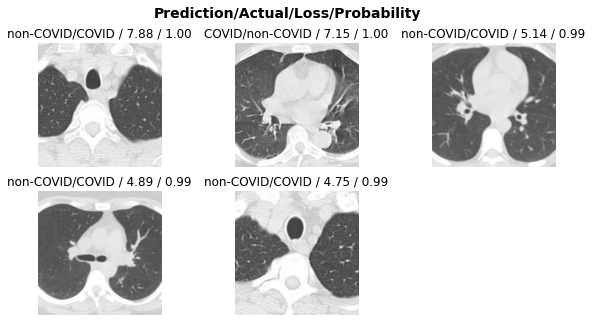

In [219]:
interp.plot_top_losses(5, figsize=(10,5))

In [220]:
res18.predict(f"{dataset_path}/COVID/Covid (1000).png")

('COVID', TensorBase(1), TensorBase([2.9967e-06, 1.0000e+00]))

In [221]:
res18.export('res18.pkl')

In [222]:
del res18
gc.collect()
torch.cuda.empty_cache()

In [223]:
res34 = cnn_learner(dls, resnet34, metrics=[F1Score(), Recall()], path=folder_path)

In [224]:
lr = 1e-3
res34.fine_tune(4, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.875923,0.481523,0.800830,0.794239,00:43


epoch,train_loss,valid_loss,f1_score,recall_score,time
0,0.406554,0.321066,0.871698,0.950617,00:56
1,0.286002,0.125288,0.957055,0.962963,00:56
2,0.180934,0.129843,0.957983,0.938272,00:56
3,0.114183,0.090179,0.973306,0.975309,00:56
4,0.078005,0.083705,0.973306,0.975309,00:56


In [225]:
df_rec34 = pd.DataFrame(res34.recorder.values, columns=['train_loss', 'valid_loss', 'f1_score', 'recall_score'])

In [226]:
df_rec34

,train_loss,valid_loss,f1_score,recall_score
0,0.406554,0.321066,0.871698,0.950617
1,0.286002,0.125288,0.957055,0.962963
2,0.180934,0.129843,0.957983,0.938272
3,0.114183,0.090179,0.973306,0.975309
4,0.078005,0.083705,0.973306,0.975309


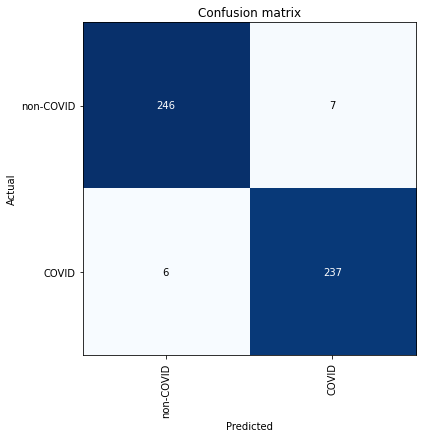

In [227]:
interp = ClassificationInterpretation.from_learner(res34)
interp.plot_confusion_matrix(figsize=(6,6))

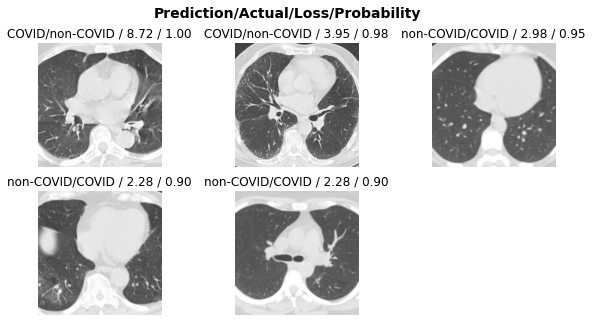

In [228]:
interp.plot_top_losses(5, figsize=(10,5))

In [229]:
res34.export('res34.pkl')

In [230]:
del res34
gc.collect()
torch.cuda.empty_cache()

In [238]:
vgg16 = cnn_learner(dls, vgg16_bn, metrics=[F1Score(), Recall()], path=folder_path)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [239]:
lr = 1e-3
vgg16.fine_tune(4, lr)

epoch,train_loss,valid_loss,f1_score,recall_score,time


RuntimeError: ignored

In [ ]:
df_recVgg = pd.DataFrame(res34.recorder.values, columns=['train_loss', 'valid_loss', 'f1_score', 'recall_score'])

In [ ]:
interp = ClassificationInterpretation.from_learner(vgg16)
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
interp.plot_top_losses(5, figsize=(10,5))

In [ ]:
vgg16.export('vgg16.pkl')

In [ ]:
del res34
gc.collect()
torch.cuda.empty_cache()

## Inference

Load the model from URL

In [232]:
res18 = load_learner(f'{folder_path}res18.pkl')

In [233]:
res34 = load_learner(f'{folder_path}res34.pkl')

In [ ]:
vgg16 = load_learner(f'{folder_path}vgg16.pkl')

In [234]:
class Ensemble:
  def __init__(self, models : dict, vocab : list = [0, 1]):
    self.models = models
    self.vocab = vocab
    self.model_list = []
    print(f'vocab: {self.vocab}')
    for name, model in models.items():
      self.model_list.append(model)
      print(f'loaded: {name}')
  
  def calc_probas(self, item):
    probas = []
    for _, model in self.models.items():
      _, _, p = model.predict(item)
      probas.append(p.numpy())
    
    probas = np.stack(probas, axis=0)
    return probas

  def predict(self, item):
    probas = self.calc_probas(item)
    mean, std = probas.mean(axis=0), probas.std(axis=0)

    return self.vocab[mean.argmax()], mean, std
  
  def get_preds(self, dl=None, with_input=True, with_loss=True, with_decoded=True, act=None):
    if dl is None: dl = self.model_list[0].dls[1]
    predictions = []
    losses = []
    for model in self.model_list:
      inputs, preds, targs, decoded, loss = model.get_preds(dl=dl, with_input=True, with_loss=True, with_decoded=True, act=None)
      predictions.append(preds)
      losses.append(loss)
    
    preds = torch.stack(predictions).mean(0)
    decoded = preds.argmax(1)
    return inputs, preds, targs, decoded, torch.stack(losses, dim=1).mean(1)
    


In [235]:
en = Ensemble({'res18': res18, 'res34': res34}, vocab=['non-covid', 'covid'])
pred, mean, std = en.predict(f"{dataset_path}/COVID/Covid (1000).png")

vocab: ['non-covid', 'covid']
loaded: res18
loaded: res34


In [236]:
inputs, predictions, targs, decoded, losses = en.get_preds(dl=dls.valid, with_input=True, with_loss=True, with_decoded=True, act=None)

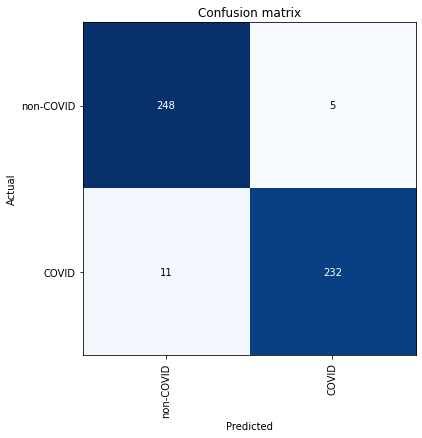

In [237]:
interp = ClassificationInterpretation.from_learner(en, dl=dls.valid)
interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
!ls {folder_path}

export.pkl  models  res18.pkl  res34.pkl


In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU" -O res34.pkl && rm -rf /tmp/cookies.txt &> 2

--2021-12-13 01:53:35--  https://docs.google.com/uc?export=download&confirm=JjZh&id=151TwzuC8exmzntoh-iQDXPJT71A1CcGU
Resolving docs.google.com (docs.google.com)... 172.217.212.100, 172.217.212.101, 172.217.212.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.212.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/p7mlquppn1nna8v4lkj49o6lb6qnip4o/rd15tp64rfh88g9cbc5lg9vhbg4371d2/1639360350000/05955112456020216338/00435299790202694079Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download [following]
--2021-12-13 01:53:35--  https://doc-0c-5g-docs.googleusercontent.com/docs/securesc/p7mlquppn1nna8v4lkj49o6lb6qnip4o/rd15tp64rfh88g9cbc5lg9vhbg4371d2/1639360350000/05955112456020216338/00435299790202694079Z/151TwzuC8exmzntoh-iQDXPJT71A1CcGU?e=download
Resolving doc-0c-5g-docs.googleusercontent.com (doc-0c-5g-docs.googleusercontent.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connec

In [ ]:
!ls -la

total 85480
drwxr-xr-x 1 root root     4096 Dec 13 01:53 .
drwxr-xr-x 1 root root     4096 Dec 13 01:38 ..
-rw-r--r-- 1 root root        0 Dec 13 01:53 2
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
drwx------ 6 root root     4096 Dec 13 01:41 gdrive
-rw-r--r-- 1 root root 87510221 Dec 13 01:53 res34.pkl
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data


In [ ]:
covid = covid.new(
    item_tfms=Resize(350),
    batch_tfms=[DeterministicFlip, RandomErasing(p=.5, sh=.1)])
dls = covid.dataloaders(path)

In [ ]:
train_features, train_labels = next(iter(dls.train))
trans = T.ToPILImage()
trans(train_features[0])

In [ ]:
torch.cuda.empty_cache()

In [ ]:
print(f'{en.vocab[mean.argmax()]} with {(mean[mean.argmax()] * 100):.3f}% probability')

In [ ]:
en.calc_probas(f"{dataset_path}/COVID/Covid (1000).png")